In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

import random
random.seed(10)

## Color

In [ ]:
# download data
!gdown 1DKYmI1R-3yOYXaE0VYWxypppOUOxnBGx
!unrar x /content/color_clean.rar

In [ ]:
# data
def import_data():
    arr = []
    y = []
    name = '/content/color_clean'
    sub_folders = os.listdir(name)
    for folder in sub_folders:
        print(f'Color {folder} - {len(os.listdir(name+"/"+folder))}')
        files = os.listdir(name+'/'+folder)
        
        for f in files:
            image = cv2.imread(name+'/'+folder+'/'+f)
            image = np.array(image, dtype=np.uint8)
            dim = (100,100)
            y.append(folder)
            resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
            arr.append(resized)
    
    return (np.asarray(arr),np.asarray(y))

In [ ]:
X, y = import_data()

In [ ]:
# colors
color_id = {'black': 0,'blue': 1,'cyan': 2,'gray': 3,'green': 4,'red': 5,'white': 6,'yellow': 7}
id_color = {0:'black', 1:'blue', 2:'cyan', 3:'gray', 4:'green', 5:'red', 6:'white', 7:'yellow'}

labels = np.unique(y)
y = pd.Series(y).map(color_id)

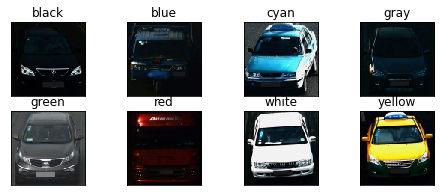

In [ ]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

fig = plt.figure(figsize=(8,3))
for i in range(8):
    
    ax = fig.add_subplot(2, 4, 1 + i, xticks=[], yticks=[])
    idx = random.choice(y[y==i].index)
    features_idx = X[idx,::]
    im = features_idx
    ax.set_title(id_color[i])
    plt.imshow(im[:,:,[2,1,0]],interpolation='nearest')

In [ ]:
# normalization
X = X / 255

# train test split
X_train, X_test, y_train_n_c, y_test_n_c = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = to_categorical(y_train_n_c)
y_test = to_categorical(y_test_n_c)

X_train.shape, X_test.shape

((9645, 100, 100, 3), (4752, 100, 100, 3))

In [ ]:
# val data
X_val = X_test[:1000]
X_test = X_test[1000:]
y_val = y_test[:1000]
y_test = y_test[1000:]

In [ ]:
# model
color_model = models.Sequential()
color_model.add(layers.Conv2D(128, kernel_size=(3,3),activation="relu"))
color_model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

color_model.add(layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
color_model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

color_model.add(layers.Conv2D(32, kernel_size=(3,3), activation="relu"))
color_model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

color_model.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
# color_model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

color_model.add(layers.Flatten())
color_model.add(layers.Dense(128, activation='relu'))
color_model.add(layers.Dense(64, activation='relu'))
color_model.add(layers.Dense(8, activation='softmax'))

In [ ]:
color_model.compile(loss='categorical_crossentropy',
                    optimizer=keras.optimizers.Adam(),
                    metrics=['accuracy'])

In [ ]:
# train
# history = 
color_model.fit(X_train, y_train,
                          epochs=35, batch_size=128, shuffle=True,
                          validation_data=(X_val, y_val), #verbose=0,
                          )

Epoch 1/35
76/76 [==============================] - 21s 114ms/step - loss: 1.0546 - accuracy: 0.6235 - val_loss: 0.6191 - val_accuracy: 0.7900
Epoch 2/35
76/76 [==============================] - 7s 95ms/step - loss: 0.4815 - accuracy: 0.8237 - val_loss: 0.5229 - val_accuracy: 0.8170
Epoch 3/35
76/76 [==============================] - 7s 95ms/step - loss: 0.4041 - accuracy: 0.8525 - val_loss: 0.5006 - val_accuracy: 0.8280
Epoch 4/35
76/76 [==============================] - 7s 97ms/step - loss: 0.3538 - accuracy: 0.8667 - val_loss: 0.3677 - val_accuracy: 0.8630
Epoch 5/35
76/76 [==============================] - 7s 96ms/step - loss: 0.2933 - accuracy: 0.8929 - val_loss: 0.3491 - val_accuracy: 0.8670
Epoch 6/35
76/76 [==============================] - 7s 96ms/step - loss: 0.2686 - accuracy: 0.9052 - val_loss: 0.3892 - val_accuracy: 0.8530
Epoch 7/35
76/76 [==============================] - 7s 96ms/step - loss: 0.2368 - accuracy: 0.9142 - val_loss: 0.3496 - val_accuracy: 0.8770
Epoch 8/35


In [ ]:
# test acc
test_loss, test_acc = color_model.evaluate(X_test, y_test)
print(test_loss, test_acc)

118/118 [==============================] - 2s 13ms/step - loss: 0.5415 - accuracy: 0.9075
0.5415217876434326 0.9075160026550293


In [ ]:
X_test.shape, X.shape

((3752, 100, 100, 3), (14397, 100, 100, 3))

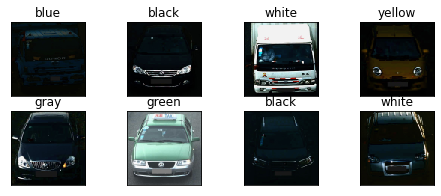

In [ ]:
x_test_predict = color_model.predict(X_test)

fig = plt.figure(figsize=(8,3))
for i in range(8, 16):    
    ax = fig.add_subplot(2, 4, 1+i-8, xticks=[], yticks=[])
    im = X_test[i]
    ax.set_title(id_color[np.argmax(x_test_predict[i])])
    plt.imshow(im[:,:,[2,1,0]], interpolation='nearest')
plt.show()

In [ ]:
test_acc=[]
for i in range(8):
    chk=np.array([np.argmax(y, axis=None, out=None)==i for y in y_test])
    test_acc.append(color_model.evaluate(X_test[chk,::],y_test[chk],verbose=0)[1])
    print(f'{labels[i]} - {round(test_acc[i],2)}')
    
print(sum(test_acc)/len(test_acc))

black - 0.93
blue - 0.89
cyan - 0.92
gray - 0.84
green - 0.99
red - 0.96
white - 0.91
yellow - 0.98
0.9271442592144012


In [ ]:
# Save model and weights
color_model.save('color_model.h5')
color_model.save_weights('color_model_weights.h5')

## Type

In [ ]:
# download data
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

!kaggle competitions download -c vehicle

!unzip vehicle

In [ ]:
!pip install fastai==1.0.61

# !pip uninstall torchvision
!pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch==1.3.0

In [ ]:
from fastai.vision import *
import numpy as np
# from fastai.vision.data import ImageDataLoaders
import torch
print(torch.__version__)

import random
random.seed(10)

1.3.0


In [ ]:
def folder_name(number):
    if(len(str(number))==6):
        return number
    gap = 6 - len(str(number))
    return gap *'0' + str(number)
    
def from_preds_to_list(preds):
    p = to_np(preds)
    lista =[]
    for i in range(len(p)):
        lista.append(np.where(np.amax(p[i])==p[i])[0][0])
    last=[]
    for element in lista:
        last.append(data.classes[element])
    return last

In [ ]:
# select classes: car, truck, bus, 
!mkdir data
!mv /content/train/train/Car /content/data/
!mv /content/train/train/Truck /content/data/
!mv /content/train/train/Bus /content/data/

In [ ]:
# create test folder
import random
random.seed(10)


!mkdir test_data
!mkdir test_data/Car
!mkdir test_data/Bus
!mkdir test_data/Truck

ind_list_car = random.sample(os.listdir("/content/data/Car/"), k=600)
for file in ind_list_car:
  !mv /content/data/Car/{file} /content/test_data/Car/

ind_list_bus = random.sample(os.listdir("/content/data/Bus/"), k=600)
for file in ind_list_bus:
  !mv /content/data/Bus/{file} /content/test_data/Bus/

ind_list_truck = random.sample(os.listdir("/content/data/Truck/"), k=600)
for file in ind_list_truck:
  !mv /content/data/Truck/{file} /content/test_data/Truck/

In [ ]:
np.random.seed(10)

# all classes
# path = "/content/train/train/"

# select classes
path = "/content/data/"

data = ImageDataBunch.from_folder(path+'.', train=path+'.', valid_pct=0.2, #test='/content/test_data',
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# data = ImageDataLoaders.from_folder(path+'.', train=path+'.', valid_pct=0.2,
#                                   # ds_tfms=get_transforms(),
#                                    size=224, num_workers=4).normalize(imagenet_stats)

data.classes

['Bus', 'Car', 'Truck']

In [ ]:
data

ImageDataBunch;

Train: LabelList (7318 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Truck,Truck,Truck,Truck,Truck
Path: /content/data;

Valid: LabelList (1829 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bus,Car,Car,Car,Car
Path: /content/data;

Test: None

In [ ]:
from fastai.metrics import accuracy, error_rate # 1 - accuracy

model_type = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir="/tmp/model/")
# model_type = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 63.8MB/s]


In [ ]:
defaults.device = torch.device('cuda')
model_type.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.479694,0.224994,0.926736,07:45
1,0.290432,0.201841,0.934390,07:54


In [ ]:
model_type.export("/content/model_type_resnet50.pkl")

In [ ]:
# model_type = load_learner('', '/content/model_type_resnet50.pkl')

In [ ]:
pred_df = pd.DataFrame()
testpath="/content/test_data/"
pred_df['Id'] = (['Car/'+x[:9] for x in os.listdir("/content/test_data/Car/")] + 
                 ['Truck/'+x[:9] for x in os.listdir("/content/test_data/Truck/")] +
                 ['Bus/'+x[:9] for x in os.listdir("/content/test_data/Bus/")])

pred_df['Type'] = ['Car'] * 600 + ['Truck'] * 600 + ['Bus'] * 600

model_type.data.add_test(ImageList.from_df(
    pred_df, testpath,
    suffix='.jpg'
))

In [ ]:
preds, _ = model_type.get_preds(DatasetType.Test)

In [ ]:
preds_category = from_preds_to_list(preds)

In [ ]:
pred_df['Prediction'] = preds_category

In [ ]:
veh_id = {'Car': 0, 'Truck': 1, 'Bus': 2}
pred_df['True_id'] = [veh_id[x] for x in pred_df['Type']]
pred_df['Pred_id'] = [veh_id[x] for x in pred_df['Prediction']]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_df.True_id, pred_df.Pred_id)

0.8872222222222222

In [ ]:
# model_type = load_learner('', '/content/model_type_resnet50.pkl')
p = cv2.imread("/content/test_data/Truck/000059_06.jpg")
t = pil2tensor(p, dtype=np.float32)
# t = t.permute(2,0,1) # Move num_channels as first dimension
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms" 

pred_img = model_type.predict(im)
pred_img

(Category tensor(1), tensor(1), tensor([0., 1., 0.]))

In [ ]:
from_preds_to_list(torch.Tensor([list(pred_img[2])]))

['Car']

In [ ]:
pred_img

(Category tensor(1), tensor(1), tensor([0., 1., 0.]))

In [ ]:
pred_df

,Id,Type,Prediction,True_id,Pred_id
0,Car/000722_04,Car,Car,0,0
1,Car/000381_05,Car,Car,0,0
2,Car/000731_07,Car,Car,0,0
3,Car/003228_18,Car,Car,0,0
4,Car/000342_18,Car,Car,0,0
...,...,...,...,...,...
1795,Bus/002086_09,Bus,Bus,2,2
1796,Bus/000540_00,Bus,Truck,2,1
1797,Bus/000646_05,Bus,Bus,2,2
1798,Bus/003835_00,Bus,Bus,2,2
